In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Load dataset 
df = pd.read_csv('kyphosis.csv')
df.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [6]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


/home/sudeep/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


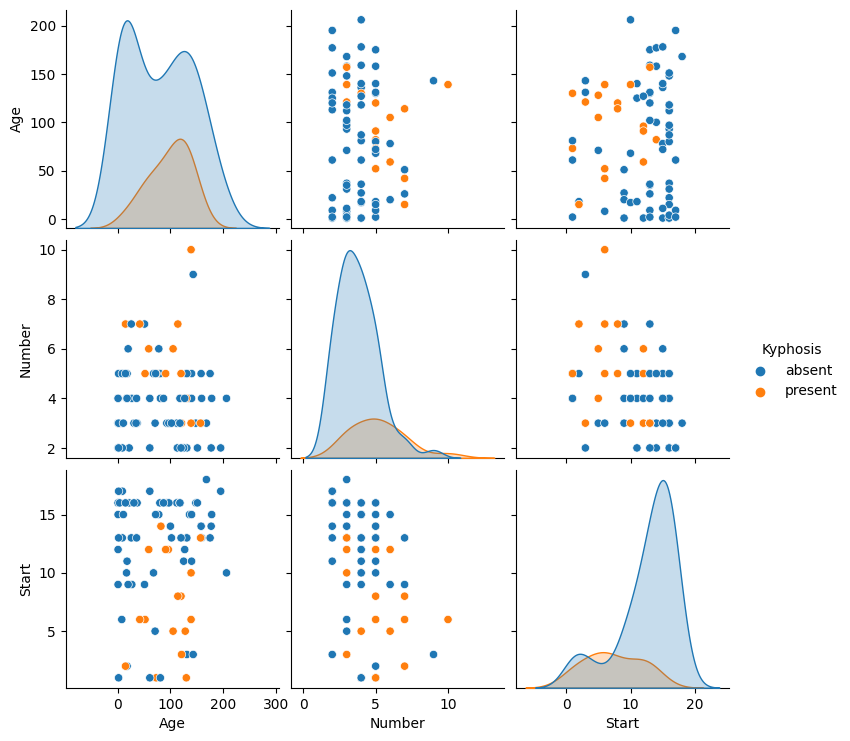

In [7]:
sns.pairplot(df, hue= 'Kyphosis')

## train_test_split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop('Kyphosis',axis=1)

In [10]:
y= df['Kyphosis']

In [41]:
X_train, X_test, y_train ,y_test = train_test_split(X,y, test_size=0.3)

### Using DecisionTreeClassifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dtree = DecisionTreeClassifier()

In [44]:
dtree.fit(X_train ,y_train)

DecisionTreeClassifier()

### Prediction

In [45]:
predictions = dtree.predict(X_test)

In [46]:
predictions

array(['absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'present', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

### Using classification matrix and confusion matrix to evaluate the performance

In [47]:
from sklearn.metrics import classification_report , confusion_matrix

In [48]:
print("Classification report : \n ", classification_report(y_test, predictions))
print("Confusion matrix: \n", confusion_matrix(y_test,predictions))

Classification report : 
                precision    recall  f1-score   support

      absent       0.86      0.82      0.84        22
     present       0.00      0.00      0.00         3

    accuracy                           0.72        25
   macro avg       0.43      0.41      0.42        25
weighted avg       0.75      0.72      0.74        25

Confusion matrix: 
 [[18  4]
 [ 3  0]]


### Using random forest 

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rfc = RandomForestClassifier(n_estimators=200)

In [65]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [66]:
pred = rfc.predict(X_test)

In [67]:
pred

array(['absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent'], dtype=object)

In [68]:
print("classification report :\n ",classification_report(y_test,pred))
print("Confusion matrix : \n",confusion_matrix(y_test,pred))

classification report :
                precision    recall  f1-score   support

      absent       0.87      0.91      0.89        22
     present       0.00      0.00      0.00         3

    accuracy                           0.80        25
   macro avg       0.43      0.45      0.44        25
weighted avg       0.77      0.80      0.78        25

Confusion matrix : 
 [[20  2]
 [ 3  0]]


In [70]:
df['Kyphosis'].value_counts()

Kyphosis
absent     64
present    17
Name: count, dtype: int64

In [76]:
pred_df = pd.DataFrame(pred, columns =['Kyphosisss'])

In [79]:
pred_df['Kyphosisss'].value_counts()

Kyphosisss
absent     23
present     2
Name: count, dtype: int64